In [79]:
from geopy.geocoders import Nominatim # library to convert an address into latitude and longitude values
import folium
import requests
import pandas as pd

In [80]:
CLIENT_ID = '************************************************' # my Foursquare ID
CLIENT_SECRET = '************************************************' # my Foursquare Secret
VERSION = '20191121' # Foursquare API version

In [81]:
def renderMapWithNeighbourhoods(latitude, longitude, neighbourhood_latitudes, neighbourhood_longitudes, neighbourhood_names):
    
    # create map of city using latitude and longitude values
    map_city = folium.Map(location=[latitude, longitude], zoom_start=10)

    # add markers to map
    for lat, lng, neighborhood in zip(neighbourhood_latitudes, neighbourhood_longitudes, neighbourhood_names):
        label = '{}'.format(neighborhood)
        label = folium.Popup(label)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            ).add_to(map_city)  

    display(map_city)

In [82]:
def exploreLocation(address):
    
    venues_list = []
    
    location = getGeographicalCoordinates(address)
    #renderMap(location)
    nearby_venues = getNearbyVenues(location)
    
    venues_list.append([(
        address.replace(", Lahore", ""),
        location[0],
        location[1],
        v['venue']['name'],
        v['venue']['location']['lat'],
        v['venue']['location']['lng'],
        v['venue']['categories'][0]['name']) for v in nearby_venues])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 'Area Latitude', 'Area Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    #display(nearby_venues)
    
    return nearby_venues

In [83]:
def getGeographicalCoordinates(address):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    #print('The geograpical coordinates of {} are {}, {}.'.format(address, latitude, longitude))
    return [location.latitude, location.longitude]

In [84]:
def renderMap(location):
    display(folium.Map(location=location, zoom_start=15))

In [85]:
def getNearbyVenues(location):

    radius = 2000
    limit = 500

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        location[0], 
        location[1], 
        radius, 
        limit)

    temp = requests.get(url).json()

    results = requests.get(url).json()["response"]['groups'][0]['items']

    #print(temp)
    #print(results)
    
    return results

In [86]:
locations = [
    "Defence Housing Authority, Phase 3",
    "Phase 4, DHA",
    "Phase 5, Defence",
    "Cavalry Ground",
    "Cantt",
    "Paragon City",
    "Gulberg 2",
    "Gulberg 3",
    "Muslim Town",
    "Garden Town",
    "Faisal Town",
    "Model Town",
    "Allama Iqbal Town",
    "Johar Town",
    "Wapda Town",
    "Valencia Town",
    "Green Town",
    "Awan Town",
    "Kot Lakhpat",
    "Thokar Niaz Baig",
    "Ichhra",
    "Sant Nagar",
    "Garhi Shahu",
    "Mozang Chungi",
    "Gulshan-e-Ravi",
    "Samanabad",
    "Old Anarkali",
    "Gawalmandi",
    "Walled City",
    "Chah Miran",
    "China Scheme",
    "Ghaziabad",
    "Daroghawala",
    "Nabi Pura",
    "Aziz Bhatti Town",
    "Saddar Town",
    "Lake City",
    "Bahria Town",
    "Mughalpura",
    "Singhpura"
]

print(len(locations))
print(locations)

40
['Defence Housing Authority, Phase 3', 'Phase 4, DHA', 'Phase 5, Defence', 'Cavalry Ground', 'Cantt', 'Paragon City', 'Gulberg 2', 'Gulberg 3', 'Muslim Town', 'Garden Town', 'Faisal Town', 'Model Town', 'Allama Iqbal Town', 'Johar Town', 'Wapda Town', 'Valencia Town', 'Green Town', 'Awan Town', 'Kot Lakhpat', 'Thokar Niaz Baig', 'Ichhra', 'Sant Nagar', 'Garhi Shahu', 'Mozang Chungi', 'Gulshan-e-Ravi', 'Samanabad', 'Old Anarkali', 'Gawalmandi', 'Walled City', 'Chah Miran', 'China Scheme', 'Ghaziabad', 'Daroghawala', 'Nabi Pura', 'Aziz Bhatti Town', 'Saddar Town', 'Lake City', 'Bahria Town', 'Mughalpura', 'Singhpura']


In [87]:
venues = []

for location in locations:
    print(location)
    venues.append(exploreLocation(location+", Lahore"))
    
area_venues_df = pd.concat(venues, ignore_index = True)

#area_venues_df

with pd.option_context('display.max_rows', None):
    display(area_venues_df)

Defence Housing Authority, Phase 3
Phase 4, DHA
Phase 5, Defence
Cavalry Ground
Cantt
Paragon City
Gulberg 2
Gulberg 3
Muslim Town
Garden Town
Faisal Town
Model Town
Allama Iqbal Town
Johar Town
Wapda Town
Valencia Town
Green Town
Awan Town
Kot Lakhpat
Thokar Niaz Baig
Ichhra
Sant Nagar
Garhi Shahu
Mozang Chungi
Gulshan-e-Ravi
Samanabad
Old Anarkali
Gawalmandi
Walled City
Chah Miran
China Scheme
Ghaziabad
Daroghawala
Nabi Pura
Aziz Bhatti Town
Saddar Town
Lake City
Bahria Town
Mughalpura
Singhpura


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Defence Housing Authority, Phase 3",31.471588,74.381620,Cosa Nostra La Gelateria,31.471677,74.374424,Coffee Shop
1,"Defence Housing Authority, Phase 3",31.471588,74.381620,Johnny & Jugnu,31.466137,74.379263,Burger Joint
2,"Defence Housing Authority, Phase 3",31.471588,74.381620,Tutti Frutti,31.474038,74.379037,Ice Cream Shop
3,"Defence Housing Authority, Phase 3",31.471588,74.381620,Yum Chinese and Thai,31.473604,74.378784,Chinese Restaurant
4,"Defence Housing Authority, Phase 3",31.471588,74.381620,Esajee's,31.472295,74.377195,Food & Drink Shop
5,"Defence Housing Authority, Phase 3",31.471588,74.381620,McDonald's,31.474985,74.377207,Fast Food Restaurant
6,"Defence Housing Authority, Phase 3",31.471588,74.381620,Hardees,31.475266,74.379267,Fast Food Restaurant
7,"Defence Housing Authority, Phase 3",31.471588,74.381620,Second Cup,31.474105,74.379050,Café
8,"Defence Housing Authority, Phase 3",31.471588,74.381620,Bundu Khan,31.473803,74.379069,BBQ Joint
9,"Defence Housing Authority, Phase 3",31.471588,74.381620,Subway,31.472758,74.376720,Sandwich Place


In [89]:
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode("Lahore")
latitude = location.latitude
longitude = location.longitude

renderMapWithNeighbourhoods(latitude, longitude, area_venues_df["Area Latitude"], area_venues_df["Area Longitude"], area_venues_df["Area"])

In [90]:
def tokenize(word):
    return word.split()

In [91]:
def isFoodCategory(category):    
    
    words_in_category = tokenize(category)
        
    #print(words_in_category)
        
    food_category_key_words = {

        'Burger' : True,
        'Coffee': True,
        'Cream': True,
        'Food': True,
        'Drink': True,
        'Restaurant': True,
        'Fast': True,
        'BBQ': True,
        'Sandwich': True,
        'Café': True,
        'Diner': True,
        'Pizza': True,
        'Dessert': True,
        'Bakery': True,
        'Donut': True,
        'Steak': True,
        'Steakhouse': True,
        'Breakfast': True,
        'Fish': True,
        'Chips': True,
        'Snack': True,
        'Tea': True,
        'Frozen': True,
        'Yogurt': True,
        'Deli': True,
        'Bodega': True,
        'Seafood': True,
        'Fried': True,
        'Chicken': True,
        'Juice': True,
        'Bar': True

    }

    for i in range(len(words_in_category)):
        try:
            food_category_key_words[words_in_category[i]]
            return True
        except:
            continue
            
    return False
    

In [92]:
def countFoodVenuesInNeighbourhood(area_venues_df, neighbourhood):
    
    #display(area_venues_df[area_venues_df["Area"] == neighbourhood]["Venue Category"])
    
    result = area_venues_df[area_venues_df["Area"] == neighbourhood]["Venue Category"].apply(lambda category : 1 if isFoodCategory(category) else 0) 
    
    #print("**********************")
    #print(result)
    
    return result.sum()
    

In [93]:
def countTotalVenuesInNeighbourhood(area_venues_df, neighbourhood):
    return area_venues_df[area_venues_df["Area"] == neighbourhood]["Venue Category"].count()

In [94]:
countFoodVenuesInNeighbourhood(area_venues_df, "Walled City")
countTotalVenuesInNeighbourhood(area_venues_df, "Walled City")

24

In [95]:
#print(area_venues_df["Area"].unique()) # or use the locations list

venues_by_locations = {"Area":[], "Total Venues":[], "Number of Food Venues": []}

for location in locations:
    venues_by_locations["Area"].append(location)
    venues_by_locations["Total Venues"].append(countTotalVenuesInNeighbourhood(area_venues_df, location))
    venues_by_locations["Number of Food Venues"].append(countFoodVenuesInNeighbourhood(area_venues_df, location))
    
venues_by_locations_df = pd.DataFrame(venues_by_locations)
    
venues_by_locations_df["% of Food Venues"] = (venues_by_locations_df["Number of Food Venues"].div(venues_by_locations_df["Total Venues"]))*100

venues_by_locations_df

,Area,Number of Food Venues,Total Venues,% of Food Venues
0,"Defence Housing Authority, Phase 3",55,68,80.882353
1,"Phase 4, DHA",22,29,75.862069
2,"Phase 5, Defence",4,9,44.444444
3,Cavalry Ground,34,50,68.000000
4,Cantt,20,35,57.142857
5,Paragon City,3,4,75.000000
6,Gulberg 2,75,100,75.000000
7,Gulberg 3,15,27,55.555556
8,Muslim Town,23,38,60.526316
9,Garden Town,30,41,73.170732


Let's sort the results in increasing % of Food Venues, since we are interested in areas with the least percentage of food venues.

In [96]:
venues_by_locations_df.sort_values(by = "% of Food Venues", inplace = True)

venues_by_locations_df

,Area,Number of Food Venues,Total Venues,% of Food Venues
29,Chah Miran,1,8,12.500000
31,Ghaziabad,1,6,16.666667
38,Mughalpura,2,10,20.000000
33,Nabi Pura,1,4,25.000000
17,Awan Town,2,6,33.333333
39,Singhpura,3,8,37.500000
12,Allama Iqbal Town,7,18,38.888889
30,China Scheme,2,5,40.000000
34,Aziz Bhatti Town,4,9,44.444444
2,"Phase 5, Defence",4,9,44.444444


First, let's visualize the total number of venues against each neighbourhood.

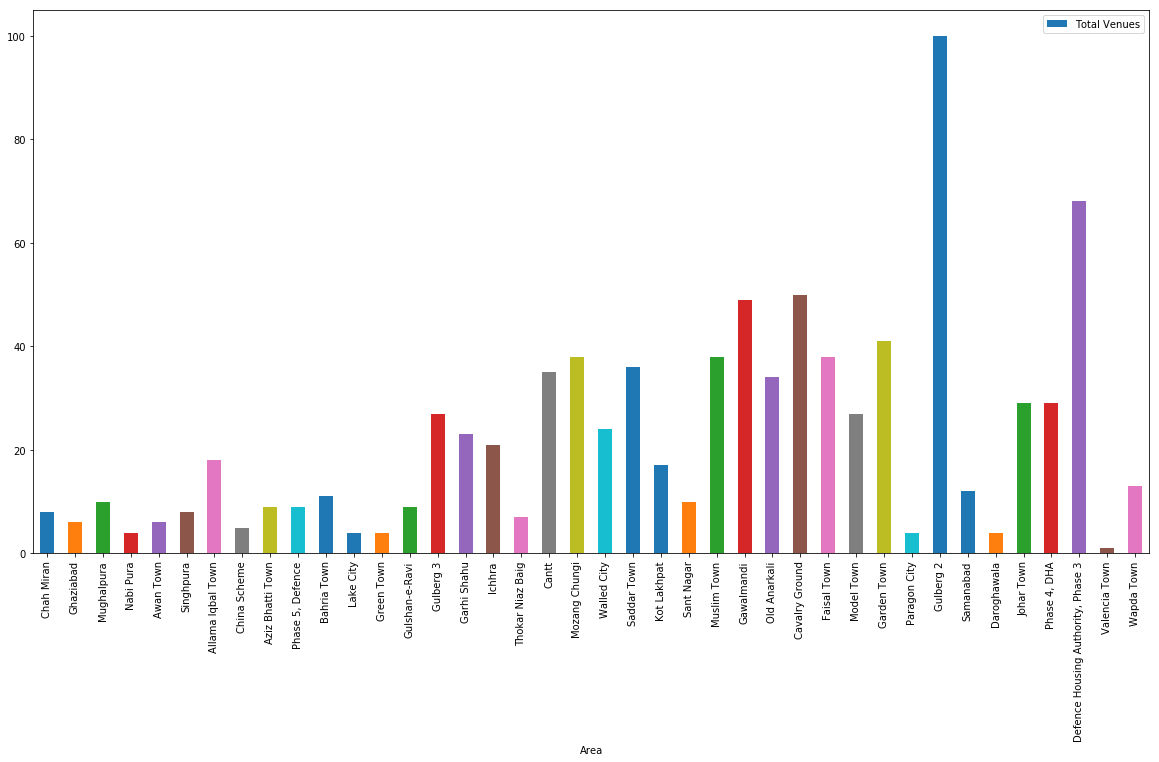

In [101]:
venues_by_locations_df.plot(kind = 'bar', x = 'Area', y = "Total Venues", figsize = (20,10))

Let's visualize the above sorted data with respect to % of Food Venues.

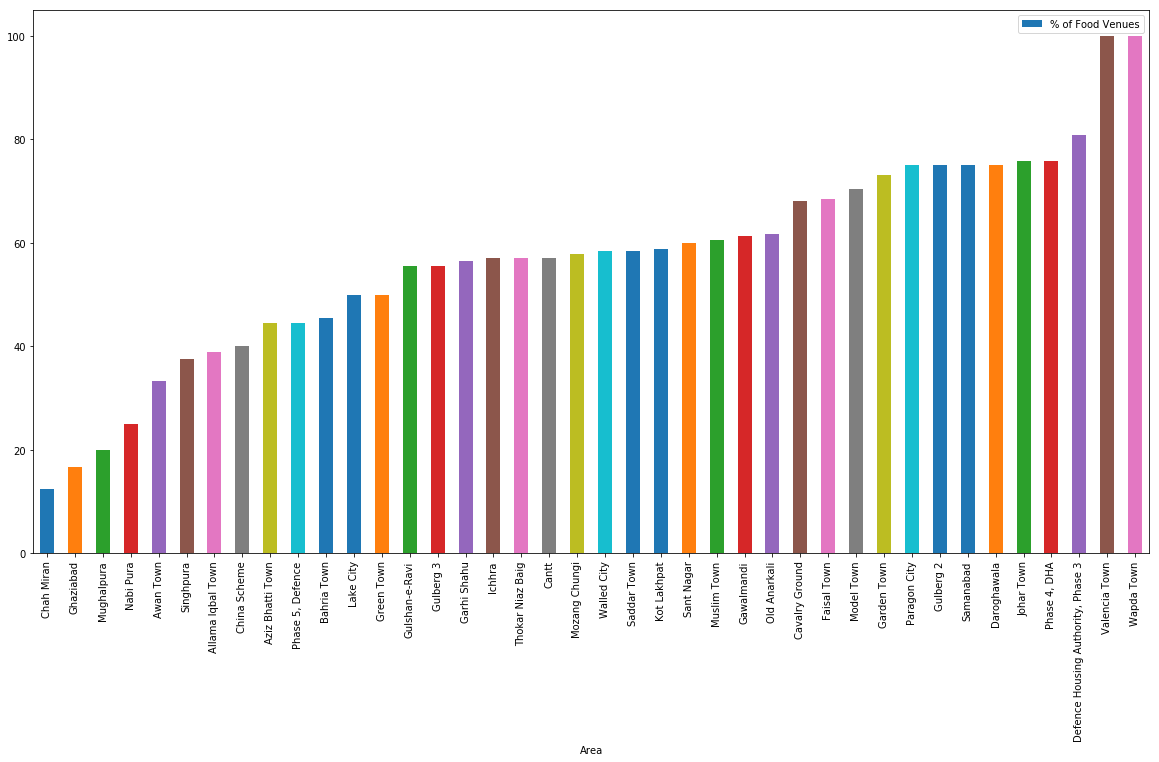

In [100]:
venues_by_locations_df.plot(kind = 'bar', x = 'Area', y = "% of Food Venues", figsize = (20,10))

### Cluster Neighbourhoods

Now that we have examined the existing neighbourhoods intuitively, and also short listed neighbourhoods that could serve as good candidates for opening a public eatery. Let's now examine the neighbourhoods by clustering algorithms and see if we can draw any different or more insights. Clustering neighbourhoods would provide stakeholders a better idea of how the neighbourhoods are related with each other, and it might also help them with deploying different marketing techniques for different types of neighbourhoods.

Clustering of neighbourhoods would be done on the basis of the types/categories of popular venues in their vicinity.

In [102]:
area_venues_df.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Defence Housing Authority, Phase 3",31.471588,74.38162,Cosa Nostra La Gelateria,31.471677,74.374424,Coffee Shop
1,"Defence Housing Authority, Phase 3",31.471588,74.38162,Johnny & Jugnu,31.466137,74.379263,Burger Joint
2,"Defence Housing Authority, Phase 3",31.471588,74.38162,Tutti Frutti,31.474038,74.379037,Ice Cream Shop
3,"Defence Housing Authority, Phase 3",31.471588,74.38162,Yum Chinese and Thai,31.473604,74.378784,Chinese Restaurant
4,"Defence Housing Authority, Phase 3",31.471588,74.38162,Esajee's,31.472295,74.377195,Food & Drink Shop


#### Let's find out how many unique categories can be curated from all the returned venues

In [103]:
print('There are {} uniques categories.'.format(len(area_venues_df['Venue Category'].unique())))

There are 118 uniques categories.


In [104]:
area_venues_df_onehot = pd.get_dummies(area_venues_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
area_venues_df_onehot['Area'] = area_venues_df['Area'] 

# move neighborhood column to the first column
fixed_columns = [area_venues_df_onehot.columns[-1]] + list(area_venues_df_onehot.columns[:-1])
area_venues_df_onehot = area_venues_df_onehot[fixed_columns]

area_venues_df_onehot.head()

,Area,Accessories Store,Afghan Restaurant,Airport,Airport Terminal,American Restaurant,Asian Restaurant,BBQ Joint,Badminton Court,Bakery,...,Supermarket,Tea Room,Thai Restaurant,Theater,Theme Park,Train Station,Turkish Restaurant,Video Store,Women's Store,Zoo
0,"Defence Housing Authority, Phase 3",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Defence Housing Authority, Phase 3",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Defence Housing Authority, Phase 3",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Defence Housing Authority, Phase 3",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Defence Housing Authority, Phase 3",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [105]:
area_venues_df_onehot.shape

(886, 119)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [106]:
lahore_grouped = area_venues_df_onehot.groupby('Area').mean().reset_index()
lahore_grouped

,Area,Accessories Store,Afghan Restaurant,Airport,Airport Terminal,American Restaurant,Asian Restaurant,BBQ Joint,Badminton Court,Bakery,...,Supermarket,Tea Room,Thai Restaurant,Theater,Theme Park,Train Station,Turkish Restaurant,Video Store,Women's Store,Zoo
0,Allama Iqbal Town,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.055556,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1,Awan Town,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
2,Aziz Bhatti Town,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
3,Bahria Town,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,Cantt,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.028571,0.00,0.142857,...,0.028571,0.00,0.000000,0.000000,0.028571,0.000000,0.00,0.000000,0.000000,0.000000
5,Cavalry Ground,0.000000,0.000000,0.000000,0.000000,0.040000,0.020000,0.020000,0.00,0.020000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000
6,Chah Miran,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.125000,0.125000,0.00,0.000000,0.000000,0.000000
7,China Scheme,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
8,Daroghawala,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.25,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
9,"Defence Housing Authority, Phase 3",0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.014706,0.00,0.014706,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.014706,0.014706,0.000000


##### Let's print each neighborhood along with the top 5 most common venues

In [108]:
num_top_venues = 5

for hood in lahore_grouped['Area']:
    print("----"+hood+"----")
    temp = lahore_grouped[lahore_grouped['Area'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allama Iqbal Town----
                  venue  freq
0  Fast Food Restaurant  0.17
1                Market  0.11
2                  Park  0.11
3      Department Store  0.11
4     Accessories Store  0.06


----Awan Town----
                 venue  freq
0     Department Store  0.17
1       Ice Cream Shop  0.17
2  Housing Development  0.17
3            BBQ Joint  0.17
4               Market  0.17


----Aziz Bhatti Town----
                  venue  freq
0         Movie Theater  0.22
1  Fast Food Restaurant  0.11
2     Outdoor Sculpture  0.11
3           Golf Course  0.11
4           Coffee Shop  0.11


----Bahria Town----
                  venue  freq
0         Movie Theater  0.18
1           Golf Course  0.09
2      Department Store  0.09
3  Fast Food Restaurant  0.09
4           Coffee Shop  0.09


----Cantt----
                  venue  freq
0                Bakery  0.14
1  Fast Food Restaurant  0.09
2  Pakistani Restaurant  0.09
3      Department Store  0.06
4           Pizza Place  

Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [109]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [116]:
import numpy as np

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Area'] = lahore_grouped['Area']

for ind in np.arange(lahore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lahore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allama Iqbal Town,Fast Food Restaurant,Department Store,Park,Market,Accessories Store
1,Awan Town,Ice Cream Shop,Clothing Store,Housing Development,Department Store,BBQ Joint
2,Aziz Bhatti Town,Movie Theater,Department Store,Golf Course,Café,Fast Food Restaurant
3,Bahria Town,Movie Theater,Department Store,Restaurant,Café,Fast Food Restaurant
4,Cantt,Bakery,Pakistani Restaurant,Fast Food Restaurant,Shopping Mall,Movie Theater


### Cluster Neighborhoods

Run k-means to cluster the neighbourhoods into 3 clusters.

In [117]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

lahore_grouped_clustering = lahore_grouped.drop('Area', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lahore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [118]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

lahore_merged = lahore_grouped[["Area"]]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
lahore_merged = lahore_merged.join(neighborhoods_venues_sorted.set_index('Area'), on='Area')

lahore_merged.head()

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allama Iqbal Town,0,Fast Food Restaurant,Department Store,Park,Market,Accessories Store
1,Awan Town,1,Ice Cream Shop,Clothing Store,Housing Development,Department Store,BBQ Joint
2,Aziz Bhatti Town,0,Movie Theater,Department Store,Golf Course,Café,Fast Food Restaurant
3,Bahria Town,0,Movie Theater,Department Store,Restaurant,Café,Fast Food Restaurant
4,Cantt,0,Bakery,Pakistani Restaurant,Fast Food Restaurant,Shopping Mall,Movie Theater


### Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

##### Cluster 0

In [119]:
lahore_merged.loc[lahore_merged['Cluster Labels'] == 0]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allama Iqbal Town,0,Fast Food Restaurant,Department Store,Park,Market,Accessories Store
2,Aziz Bhatti Town,0,Movie Theater,Department Store,Golf Course,Café,Fast Food Restaurant
3,Bahria Town,0,Movie Theater,Department Store,Restaurant,Café,Fast Food Restaurant
4,Cantt,0,Bakery,Pakistani Restaurant,Fast Food Restaurant,Shopping Mall,Movie Theater
5,Cavalry Ground,0,Café,Hotel,Pakistani Restaurant,Fast Food Restaurant,Coffee Shop
7,China Scheme,0,Historic Site,Pakistani Restaurant,Fast Food Restaurant,Business Service,Shopping Mall
8,Daroghawala,0,Pakistani Restaurant,Asian Restaurant,Badminton Court,Fish & Chips Shop,Zoo
9,"Defence Housing Authority, Phase 3",0,Café,Burger Joint,Fast Food Restaurant,Pizza Place,Coffee Shop
11,Garden Town,0,Pakistani Restaurant,Café,BBQ Joint,Bus Line,Asian Restaurant
12,Garhi Shahu,0,Hotel,Chinese Restaurant,Pakistani Restaurant,Mediterranean Restaurant,Lounge


##### Cluster 1

In [120]:
lahore_merged.loc[lahore_merged['Cluster Labels'] == 1]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Awan Town,1,Ice Cream Shop,Clothing Store,Housing Development,Department Store,BBQ Joint
6,Chah Miran,1,Historic Site,Pizza Place,Garden,Bus Station,Train Station
10,Faisal Town,1,Shopping Mall,Bakery,Pizza Place,Pakistani Restaurant,Department Store
14,Ghaziabad,1,Department Store,Clothing Store,Market,Bakery,Flea Market
18,Gulshan-e-Ravi,1,Bus Station,Bakery,Department Store,Mexican Restaurant,Pakistani Restaurant
19,Ichhra,1,Bakery,Market,Bus Station,Ice Cream Shop,Fried Chicken Joint
21,Kot Lakhpat,1,Shopping Mall,Ice Cream Shop,Furniture / Home Store,Pizza Place,Convenience Store
24,Mozang Chungi,1,Fast Food Restaurant,Market,Asian Restaurant,Bakery,Breakfast Spot
25,Mughalpura,1,Bakery,Market,Department Store,Flea Market,Multiplex
27,Nabi Pura,1,Badminton Court,Metro Station,Brazilian Restaurant,Bus Station,Electronics Store


##### Cluster 2

In [121]:
lahore_merged.loc[lahore_merged['Cluster Labels'] == 2]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
37,Valencia Town,2,Burger Joint,Zoo,Deli / Bodega,Dessert Shop,Diner
